In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
playstore_data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 9. Dimensions of the data

In [3]:
playstore_data.shape

(10841, 13)

# 10. Rating variation by category using a boxplot

### Cleaning data. Removing the row having category as 1.9

In [4]:
playstore_data[playstore_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
playstore_data.drop(playstore_data[playstore_data['Category'] == '1.9'].index, inplace=True)
playstore_data[playstore_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


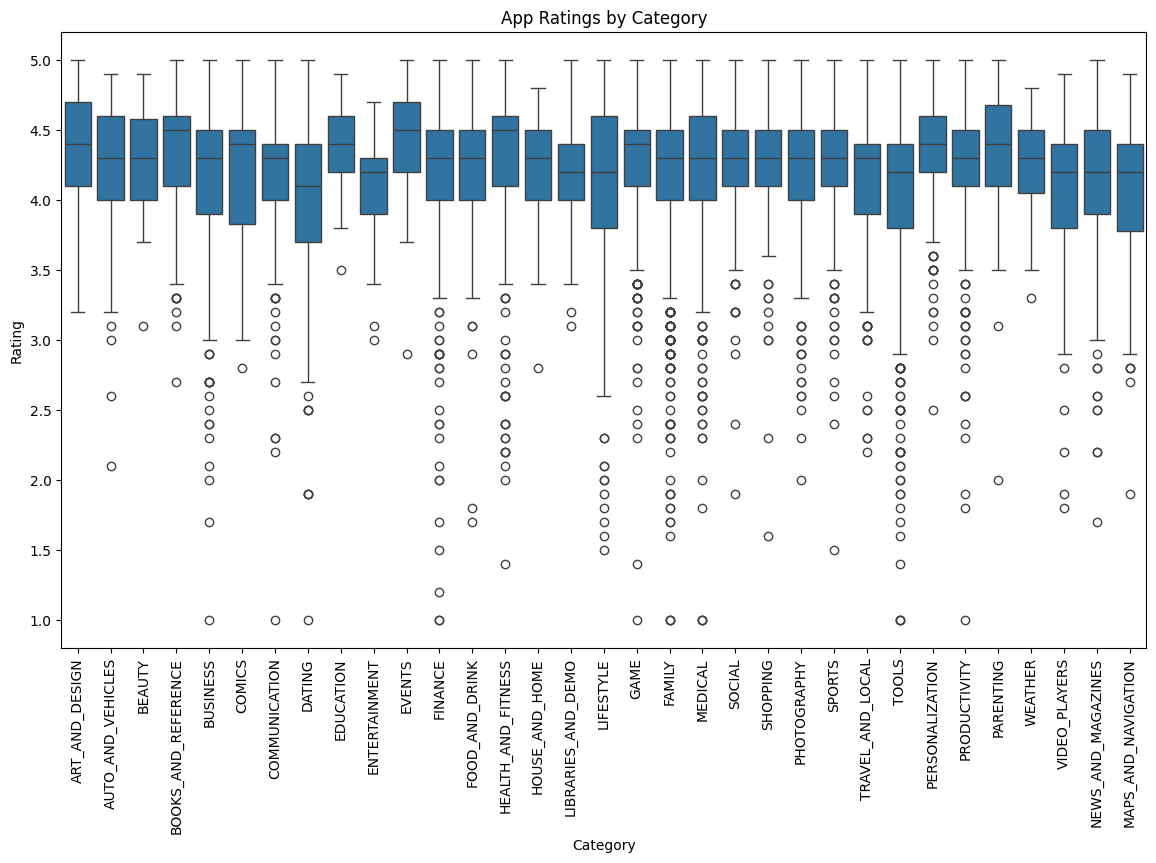

In [6]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=playstore_data)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

# 11. Missing values

In [7]:
missing_values = playstore_data.isnull().sum()
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [8]:
# Filling missing values in 'Rating' with the average
playstore_data = playstore_data.fillna({'Rating': playstore_data['Rating'].mean()})
# Forward fill missing values in 'Current Ver' and 'Android Ver'
playstore_data['Current Ver'] = playstore_data['Current Ver'].ffill()
playstore_data['Android Ver'] = playstore_data['Android Ver'].ffill()
playstore_data['Type'] = playstore_data['Type'].ffill()

playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 12. Relationship between app size and rating using a scatter plot.

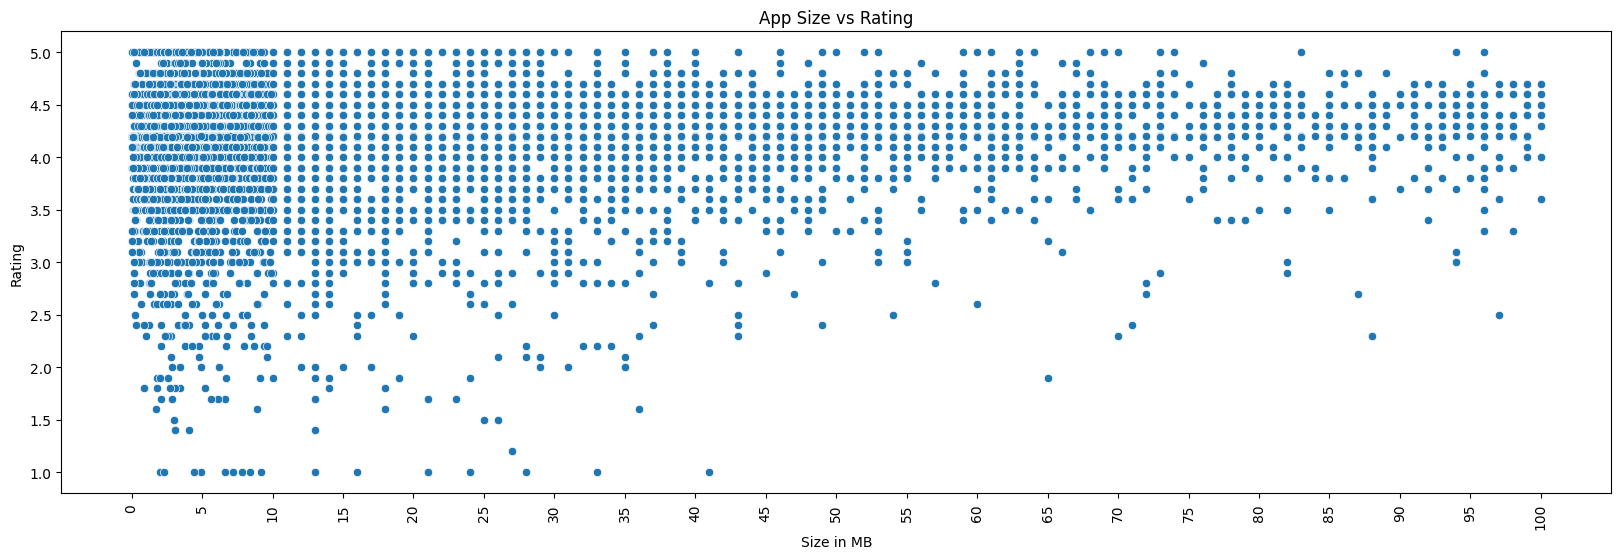

In [10]:
def convert_size_to_megabytes(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    else:
        return 0

playstore_data['Size_MB'] = playstore_data['Size'].apply(convert_size_to_megabytes)
# treating 'Varies with device' as missing value and filling it with median
playstore_data = playstore_data.fillna({'Size_MB': playstore_data['Size_MB'].median()})

plt.figure(figsize=(20, 6))
sns.scatterplot(x='Size_MB', y='Rating', data=playstore_data)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(25))
# plt.xticks(np.arange(0, playstore_data['Size_MB'].max() + 5, 5))
# plt.gca().set_xticklabels([f'{x}M' for x in np.arange(0, playstore_data['Size_MB'].max() + 5, 5)])
plt.title('App Size vs Rating')
plt.xlabel('Size in MB')
plt.ylabel('Rating')
plt.show()

# 13. App type and its impact on price using a bar chart.

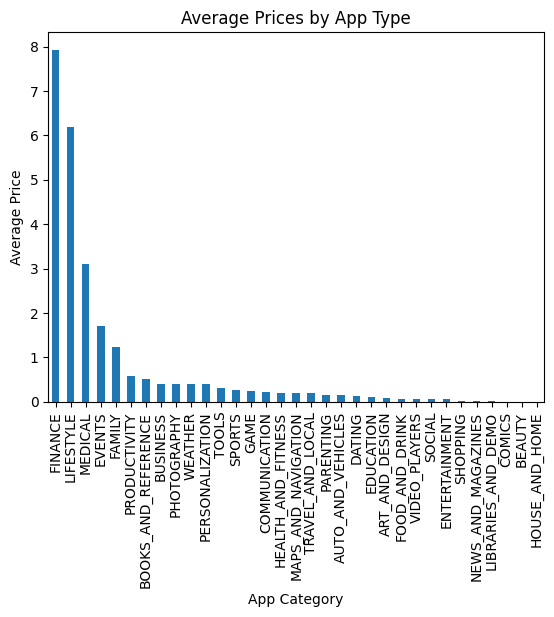

In [11]:
playstore_data['Price_Dollars'] = pd.to_numeric(playstore_data['Price'].str.replace('$', ''), errors='coerce')
avg_prices_by_type = playstore_data.groupby('Category')['Price_Dollars'].mean().sort_values(ascending=False)
avg_prices_by_type.plot(kind='bar')
plt.title('Average Prices by App Type')
plt.xlabel('App Category')
plt.ylabel('Average Price')
plt.show()

# 14. Top 10 most popular apps based on number of installs

In [12]:
playstore_data['Installations'] = playstore_data['Installs'].str.replace('+', '')
playstore_data['Installations'] = pd.to_numeric(playstore_data['Installations'].str.replace(',', ''))
top_apps = playstore_data.nlargest(10, 'Installations')[['App', 'Installations']]
top_apps

,App,Installations
152,Google Play Books,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
336,WhatsApp Messenger,1000000000
338,Google Chrome: Fast & Secure,1000000000
340,Gmail,1000000000
341,Hangouts,1000000000
381,WhatsApp Messenger,1000000000
382,Messenger – Text and Video Chat for Free,1000000000
386,Hangouts,1000000000
391,Skype - free IM & video calls,1000000000


# 15. Analyzing popular app categories for a new launch

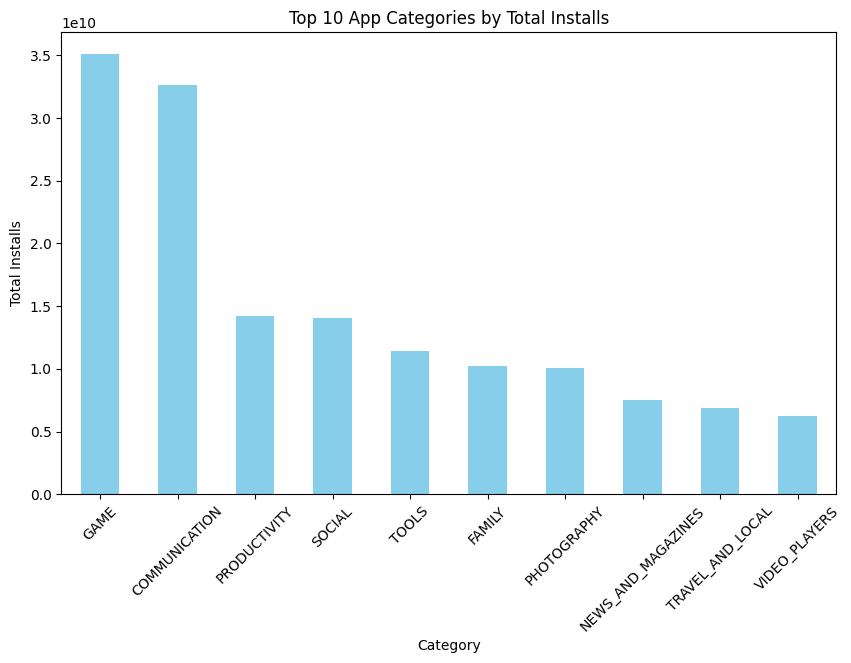

In [13]:
category_installs = playstore_data.groupby('Category')['Installations'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_installs.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 App Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()

# 16. Analyzing Successful App Developers

<Figure size 1000x600 with 0 Axes>

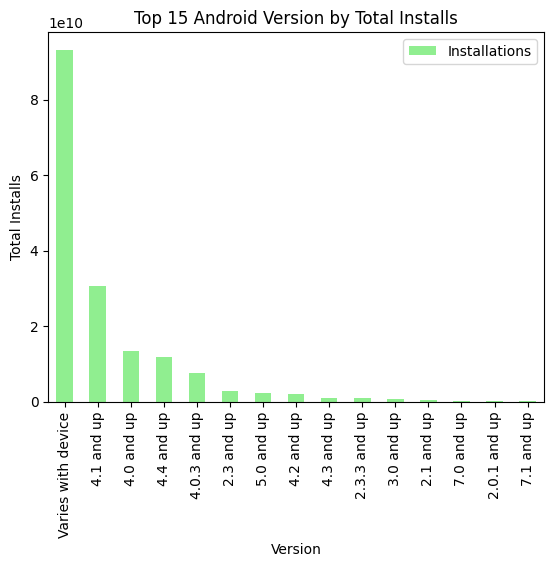

In [14]:
developer_metrics = playstore_data.groupby('Android Ver').agg({'Rating': 'mean', 'Installations': 'sum'}).sort_values(by='Installations', ascending=False)
plt.figure(figsize=(10, 6))
developer_metrics.head(15).plot(kind='bar', y='Installations', color='lightgreen')
plt.title('Top 15 Android Version by Total Installs')
plt.xlabel('Version')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()

# 17. Analyzing the Best Time to Launch a New App

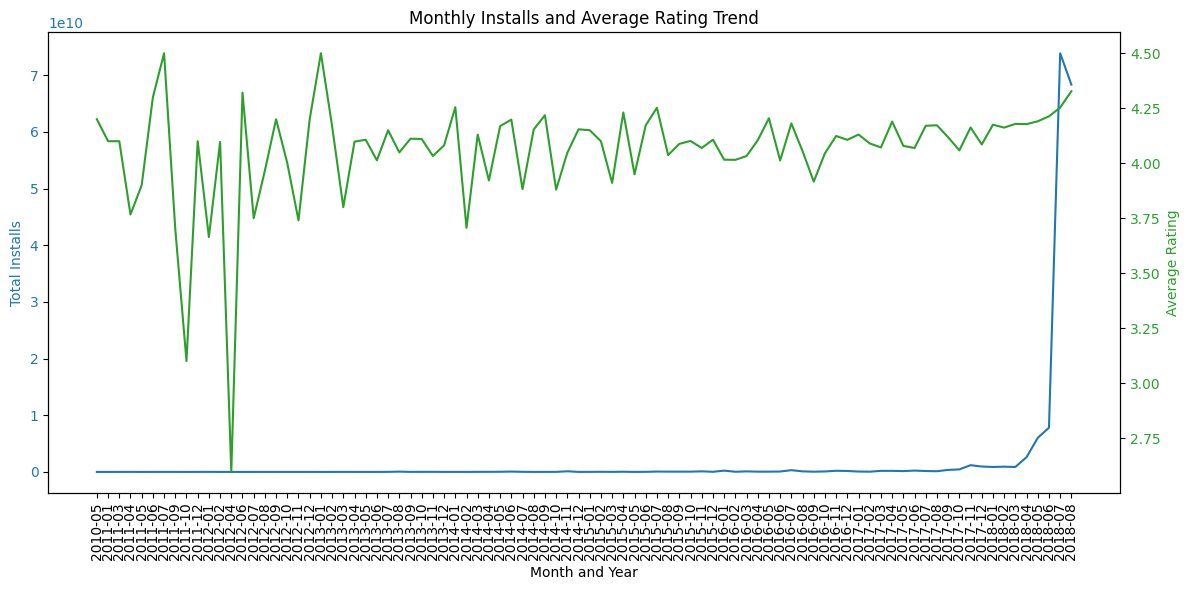

In [15]:
# Convert 'Last Updated' to datetime
playstore_data['Last Updated date'] = pd.to_datetime(playstore_data['Last Updated'])

# Extract month and year from 'Last Updated'
playstore_data['Month_Year'] = playstore_data['Last Updated date'].dt.to_period('M')

# Group by month and year and calculate total installs and average rating
monthly_metrics = playstore_data.groupby('Month_Year').agg({'Installations': 'sum', 'Rating': 'mean'})

# Plot the trend of installs and average rating over time
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Total Installs', color=color)
ax1.plot(monthly_metrics.index.astype(str), monthly_metrics['Installations'], color=color)
ax1.tick_params(axis='x', labelrotation=90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Average Rating', color=color)  
ax2.plot(monthly_metrics.index.astype(str), monthly_metrics['Rating'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Installs and Average Rating Trend')
fig.tight_layout()
plt.show()
